In [1]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
%matplotlib inline

Using TensorFlow backend.


In [2]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [48]:
# fix random seed for reproducibility
numpy.random.seed(3)

In [5]:
# load the dataset
dataframe = read_csv('Datasets.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [6]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [7]:
# split into train and test sets
train_size = int(len(dataset) * 0.60)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [8]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [9]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [14]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
h = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0099
Epoch 2/100
 - 0s - loss: 0.0051
Epoch 3/100
 - 0s - loss: 0.0045
Epoch 4/100
 - 0s - loss: 0.0040
Epoch 5/100
 - 0s - loss: 0.0034
Epoch 6/100
 - 0s - loss: 0.0028
Epoch 7/100
 - 0s - loss: 0.0023
Epoch 8/100
 - 0s - loss: 0.0017
Epoch 9/100
 - 0s - loss: 0.0012
Epoch 10/100
 - 0s - loss: 8.7153e-04
Epoch 11/100
 - 0s - loss: 6.1272e-04
Epoch 12/100
 - 0s - loss: 4.1161e-04
Epoch 13/100
 - 0s - loss: 3.1456e-04
Epoch 14/100
 - 0s - loss: 2.5733e-04
Epoch 15/100
 - 0s - loss: 2.2869e-04
Epoch 16/100
 - 0s - loss: 2.1899e-04
Epoch 17/100
 - 0s - loss: 2.1782e-04
Epoch 18/100
 - 0s - loss: 2.2092e-04
Epoch 19/100
 - 0s - loss: 2.1717e-04
Epoch 20/100
 - 0s - loss: 2.0975e-04
Epoch 21/100
 - 0s - loss: 2.1600e-04
Epoch 22/100
 - 0s - loss: 2.1694e-04
Epoch 23/100
 - 0s - loss: 2.1551e-04
Epoch 24/100
 - 0s - loss: 2.2109e-04
Epoch 25/100
 - 0s - loss: 2.2503e-04
Epoch 26/100
 - 0s - loss: 2.2043e-04
Epoch 27/100
 - 0s - loss: 2.1632e-04
Epoch 28/100
 - 0s 

Text(0.5, 1.0, 'Loss Plot for Model Training')

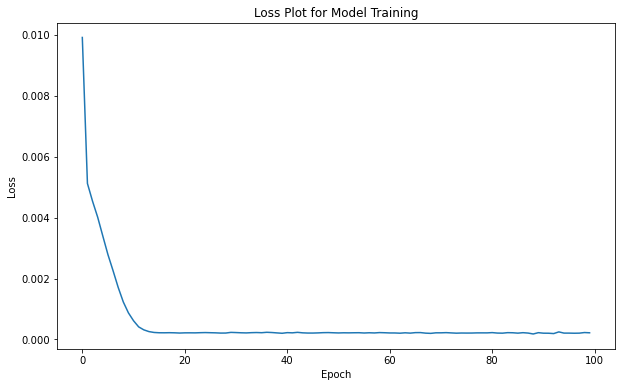

In [23]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.lineplot([x for x in range(100)], h.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss Plot for Model Training")

In [24]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [25]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [26]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.71 RMSE
Test Score: 11.73 RMSE


In [27]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [28]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back):len(dataset)-1, :] = testPredict
# plot baseline and predictions

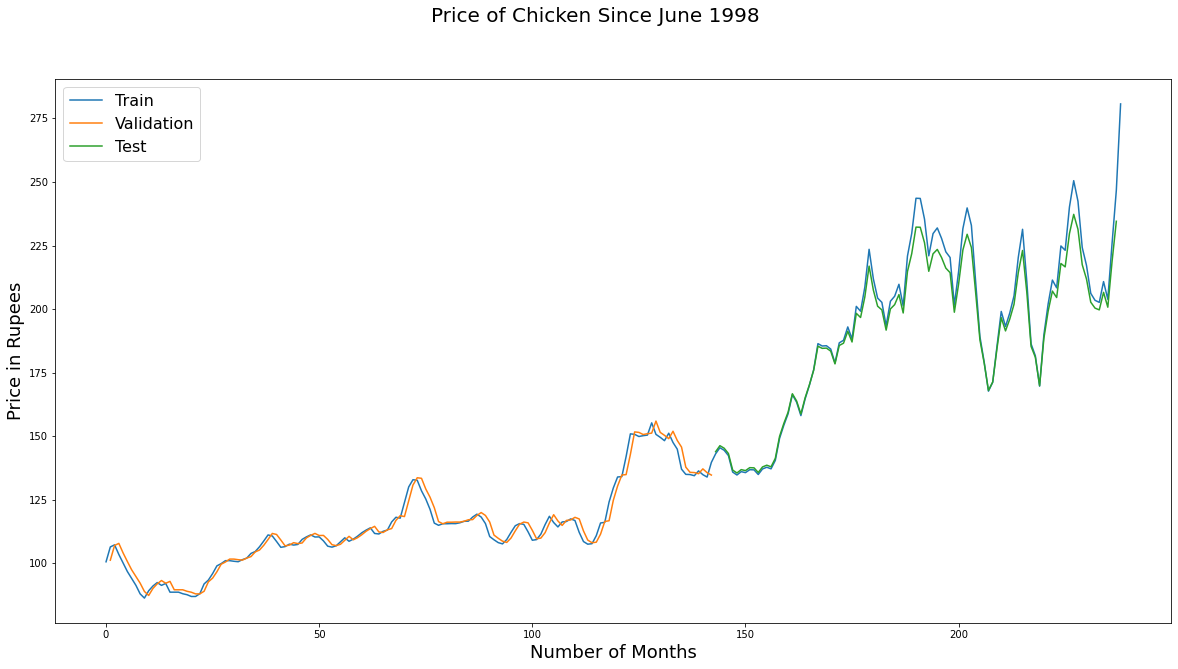

In [47]:
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(dataset))
plt.xlabel('Number of Months', fontsize=18)
plt.ylabel('Price in Rupees', fontsize=18)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.suptitle('Price of Chicken Since June 1998', fontsize=20)
plt.legend( ['Train', 'Validation', 'Test'], loc=2, prop={'size': 16})